<a href="https://colab.research.google.com/github/Sitharth07/Llama-3-for-Tamil-English-Sentiment-Analysis-Report/blob/main/ANARIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas google-generativeai sqlalchemy matplotlib

In [2]:
import pandas as pd
import sqlite3
import google.generativeai as genai
import os
import matplotlib.pyplot as plt
import io
import base64
from IPython.display import display, HTML

# Suppress matplotlib warnings for cleaner output
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Define file paths for the uploaded CSVs
ad_sales_filepath = 'Product-Level Ad Sales and Metrics (mapped) - Product-Level Ad Sales and Metrics (mapped).csv'
total_sales_filepath = 'Product-Level Total Sales and Metrics (mapped) - Product-Level Total Sales and Metrics (mapped).csv'
eligibility_filepath = 'Product-Level Eligibility Table (mapped) - Product-Level Eligibility Table (mapped).csv'

# Load DataFrames from CSV files
try:
    df_ad_sales = pd.read_csv(ad_sales_filepath, parse_dates=['date'])
    df_total_sales = pd.read_csv(total_sales_filepath, parse_dates=['date'])
    df_eligibility = pd.read_csv(eligibility_filepath, parse_dates=['eligibility_datetime_utc'])

    print("DataFrames loaded successfully from CSV files.")
    print(f"df_ad_sales shape: {df_ad_sales.shape}")
    print(f"df_total_sales shape: {df_total_sales.shape}")
    print(f"df_eligibility shape: {df_eligibility.shape}")

    # Display first few rows to confirm
    print("\n--- df_ad_sales head ---")
    print(df_ad_sales.head())
    print("\n--- df_total_sales head ---")
    print(df_total_sales.head())
    print("\n--- df_eligibility head ---")
    print(df_eligibility.head())

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure you have uploaded all three CSV files to your Colab environment.")
except Exception as e:
    print(f"An error occurred while reading CSV files: {e}")

DataFrames loaded successfully from CSV files.
df_ad_sales shape: (3696, 7)
df_total_sales shape: (702, 4)
df_eligibility shape: (4381, 4)

--- df_ad_sales head ---
        date  item_id  ad_sales  impressions  ad_spend  clicks  units_sold
0 2025-06-01        0    332.96         1963     16.87       8           3
1 2025-06-01        1      0.00         1764     20.39      11           0
2 2025-06-01        2     95.99          169      0.48       0           1
3 2025-06-01        3   1001.93         6943     75.69      31           9
4 2025-06-01        4   1096.98        59046    401.39     285           5

--- df_total_sales head ---
        date  item_id  total_sales  total_units_ordered
0 2025-06-01        0       309.99                    1
1 2025-06-01        3       338.00                    2
2 2025-06-01        4       617.99                    3
3 2025-06-01        9       219.00                    1
4 2025-06-01       12       534.00                    3

--- df_eligibility 

In [4]:
# Define file paths for the uploaded CSVs
ad_sales_filepath = 'Product-Level Ad Sales and Metrics (mapped) - Product-Level Ad Sales and Metrics (mapped).csv'
total_sales_filepath = 'Product-Level Total Sales and Metrics (mapped) - Product-Level Total Sales and Metrics (mapped).csv'
eligibility_filepath = 'Product-Level Eligibility Table (mapped) - Product-Level Eligibility Table (mapped).csv'

# Load DataFrames from CSV files
try:
    df_ad_sales = pd.read_csv(ad_sales_filepath, parse_dates=['date'])
    df_total_sales = pd.read_csv(total_sales_filepath, parse_dates=['date'])
    df_eligibility = pd.read_csv(eligibility_filepath, parse_dates=['eligibility_datetime_utc'])

    print("DataFrames loaded successfully from CSV files.")
    print(f"df_ad_sales shape: {df_ad_sales.shape}")
    print(f"df_total_sales shape: {df_total_sales.shape}")
    print(f"df_eligibility shape: {df_eligibility.shape}")

    # Display first few rows to confirm
    print("\n--- df_ad_sales head ---")
    print(df_ad_sales.head())
    print("\n--- df_total_sales head ---")
    print(df_total_sales.head())
    print("\n--- df_eligibility head ---")
    print(df_eligibility.head())

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure you have uploaded all three CSV files to your Colab environment.")
except Exception as e:
    print(f"An error occurred while reading CSV files: {e}")

DataFrames loaded successfully from CSV files.
df_ad_sales shape: (3696, 7)
df_total_sales shape: (702, 4)
df_eligibility shape: (4381, 4)

--- df_ad_sales head ---
        date  item_id  ad_sales  impressions  ad_spend  clicks  units_sold
0 2025-06-01        0    332.96         1963     16.87       8           3
1 2025-06-01        1      0.00         1764     20.39      11           0
2 2025-06-01        2     95.99          169      0.48       0           1
3 2025-06-01        3   1001.93         6943     75.69      31           9
4 2025-06-01        4   1096.98        59046    401.39     285           5

--- df_total_sales head ---
        date  item_id  total_sales  total_units_ordered
0 2025-06-01        0       309.99                    1
1 2025-06-01        3       338.00                    2
2 2025-06-01        4       617.99                    3
3 2025-06-01        9       219.00                    1
4 2025-06-01       12       534.00                    3

--- df_eligibility 

In [5]:
# Connect to an in-memory SQLite database
# For persistent storage, replace ':memory:' with a file path like 'ecommerce_data.db'
conn = sqlite3.connect(':memory:')

# Write DataFrames to SQL tables
# Ensure DataFrames were loaded successfully before attempting to_sql
if 'df_ad_sales' in locals() and not df_ad_sales.empty:
    df_ad_sales.to_sql('ad_sales_metrics', conn, if_exists='replace', index=False)
    print("ad_sales_metrics table created.")
else:
    print("df_ad_sales is empty or not loaded. Skipping ad_sales_metrics table creation.")

if 'df_total_sales' in locals() and not df_total_sales.empty:
    df_total_sales.to_sql('total_sales_metrics', conn, if_exists='replace', index=False)
    print("total_sales_metrics table created.")
else:
    print("df_total_sales is empty or not loaded. Skipping total_sales_metrics table creation.")

if 'df_eligibility' in locals() and not df_eligibility.empty:
    df_eligibility.to_sql('product_eligibility', conn, if_exists='replace', index=False)
    print("product_eligibility table created.")
else:
    print("df_eligibility is empty or not loaded. Skipping product_eligibility table creation.")

print("\nData loading into SQLite database attempted.")

# Get and print schema for LLM context
def get_schema(connection):
    cursor = connection.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    schema_info = ""
    for table_name_tuple in tables:
        table_name = table_name_tuple[0]  # Corrected: Access the first element of the tuple
        schema_info += f"CREATE TABLE {table_name} (\n"
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
        col_defs = []  # Corrected: Initialize col_defs as an empty list
        for col in columns:
            cid, name, type, notnull, dflt_value, pk = col
            col_defs.append(f"  {name} {type}{' PRIMARY KEY' if pk else ''}{' NOT NULL' if notnull and not pk else ''}")
        schema_info += ",\n".join(col_defs)
        schema_info += "\n);\n\n"
    return schema_info

db_schema = get_schema(conn)
print("\n--- Database Schema for LLM ---")
print(db_schema)
print("-----------------------------")

ad_sales_metrics table created.
total_sales_metrics table created.
product_eligibility table created.

Data loading into SQLite database attempted.

--- Database Schema for LLM ---
CREATE TABLE ad_sales_metrics (
  date TIMESTAMP,
  item_id INTEGER,
  ad_sales REAL,
  impressions INTEGER,
  ad_spend REAL,
  clicks INTEGER,
  units_sold INTEGER
);

CREATE TABLE total_sales_metrics (
  date TIMESTAMP,
  item_id INTEGER,
  total_sales REAL,
  total_units_ordered INTEGER
);

CREATE TABLE product_eligibility (
  eligibility_datetime_utc TIMESTAMP,
  item_id INTEGER,
  eligibility INTEGER,
  message TEXT
);


-----------------------------


In [6]:
import sqlite3
import logging
from typing import List, Dict, Any, Optional

def ask_ai_agent(question: str, db_connection: sqlite3.Connection, schema: str) -> str:
    """
    Processes a natural language question to generate SQL, query the database,
    and return a human-readable answer.

    Args:
        question: Natural language question to process
        db_connection: SQLite database connection
        schema: Database schema information

    Returns:
        Human-readable answer or error message
    """

    def _generate_sql_query(question: str, schema: str) -> Optional[str]:
        """Generate SQL query using LLM."""
        prompt = f"""You are an expert SQL data analyst. Your task is to convert a user's question into a valid SQLite SQL query.
The database schema is provided below. Only output the SQL query. Do not add any explanation or any other text.
Do not use markdown backticks.

Database Schema:
{schema}

User's Question: {question}
SQL Query:"""

        print(f"--- Prompting LLM with question: '{question}' ---")

        try:
            response = model.generate_content(prompt)
            sql_query = response.text.strip()
            print(f"--- Generated SQL Query: ---\n{sql_query}\n----------------------------")
            return sql_query
        except Exception as e:
            logging.error(f"Error generating SQL query: {e}")
            return None

    def _execute_query(sql_query: str, db_connection: sqlite3.Connection) -> Optional[tuple]:
        """Execute SQL query and return results with column names."""
        try:
            cursor = db_connection.cursor()
            cursor.execute(sql_query)
            results = cursor.fetchall()
            column_names = [description[0] for description in cursor.description] if cursor.description else []
            print(f"--- Query Results: ---\n{results}\n----------------------")
            return results, column_names
        except sqlite3.Error as e:
            logging.error(f"Database error: {e}")
            return None

    def _format_results(results: List[tuple], column_names: List[str]) -> str:
        """Format query results into human-readable format."""
        if not results:
            return "No results found for your query."

        # Convert to list of dictionaries for easier processing
        formatted_results = [dict(zip(column_names, row)) for row in results]

        # Specialized formatting for common business metrics
        if len(formatted_results) == 1:  # Single result formatters
            single_result = formatted_results[0]

            # Total sales formatting
            if "total_sales" in column_names:
                total_sales = single_result['total_sales']
                return f"The total sales revenue is: ${total_sales:,.2f}"

            # ROAS formatting
            elif "roas" in column_names:
                roas_value = single_result['roas']
                return f"The Return on Ad Spend (ROAS) is: {roas_value:.2f}x. This means for every $1 spent on ads, ${roas_value:.2f} in revenue was generated."

            # Average formatting
            elif any(col.startswith('avg_') for col in column_names):
                avg_cols = [col for col in column_names if col.startswith('avg_')]
                response_lines = []
                for col in avg_cols:
                    metric_name = col.replace('avg_', '').replace('_', ' ').title()
                    value = single_result[col]
                    if isinstance(value, (int, float)):
                        response_lines.append(f"Average {metric_name}: {value:,.2f}")
                    else:
                        response_lines.append(f"Average {metric_name}: {value}")
                return "\n".join(response_lines)

        # Multi-result specialized formatters
        if "cpc" in column_names:
            response_lines = ["Here are the products with their Cost Per Click (CPC):"]
            for row in formatted_results:
                item_id = row.get('item_id', row.get('product_id', 'N/A'))
                product_name = row.get('product_name', f'Product ID: {item_id}')
                cpc_value = row.get('cpc', 0)
                response_lines.append(f"- {product_name}: ${cpc_value:.2f}")
            return "\n".join(response_lines)

        # Revenue/sales by category formatting
        elif any(col in column_names for col in ['revenue', 'sales']) and len(formatted_results) > 1:
            response_lines = ["Here are the results:"]
            for row in formatted_results:
                line_parts = []
                for col, value in row.items():
                    if isinstance(value, (int, float)) and col in ['revenue', 'sales', 'total_sales']:
                        line_parts.append(f"{col.replace('_', ' ').title()}: ${value:,.2f}")
                    else:
                        line_parts.append(f"{col.replace('_', ' ').title()}: {value}")
                response_lines.append(f"- {', '.join(line_parts)}")
            return "\n".join(response_lines)

        # Generic table formatting for complex results
        return _format_as_table(formatted_results, column_names)

    def _format_as_table(formatted_results: List[Dict[str, Any]], column_names: List[str]) -> str:
        """Format results as a readable table."""
        if not formatted_results:
            return "No results found."

        # Calculate column widths
        col_widths = {}
        for col in column_names:
            col_widths[col] = max(
                len(str(col)),
                max(len(str(row.get(col, ''))) for row in formatted_results)
            )

        # Create header
        header_parts = [col.replace('_', ' ').title().ljust(col_widths[col]) for col in column_names]
        header = " | ".join(header_parts)

        # Create separator
        separator = "-|-".join(['-' * col_widths[col] for col in column_names])

        # Create data rows
        data_rows = []
        for row in formatted_results:
            row_parts = []
            for col in column_names:
                value = row.get(col, '')
                # Format numbers nicely
                if isinstance(value, float):
                    if col in ['revenue', 'sales', 'total_sales', 'cost']:
                        formatted_value = f"${value:,.2f}"
                    else:
                        formatted_value = f"{value:.2f}"
                elif isinstance(value, int) and col in ['revenue', 'sales', 'total_sales', 'cost']:
                    formatted_value = f"${value:,}"
                else:
                    formatted_value = str(value)

                row_parts.append(formatted_value.ljust(col_widths[col]))
            data_rows.append(" | ".join(row_parts))

        return f"Query successful. Here are the results:\n\n{header}\n{separator}\n" + "\n".join(data_rows)

    # Main execution flow
    try:
        # 1. Generate SQL query
        sql_query = _generate_sql_query(question, schema)
        if sql_query is None:
            return "Error: Failed to generate SQL query. Please try rephrasing your question."

        # 2. Execute query
        query_result = _execute_query(sql_query, db_connection)
        if query_result is None:
            return f"Database error: The generated SQL might be incorrect or incompatible with the schema. Generated query: {sql_query}"

        results, column_names = query_result

        # 3. Format and return results
        return _format_results(results, column_names)

    except Exception as e:
        logging.error(f"Unexpected error in ask_ai_agent: {e}")
        return f"An unexpected error occurred: {e}"

In [7]:
# Access the API key from Colab's user secrets
# If you haven't set it up, go to the key icon on the left sidebar -> 'Secrets' -> Add a new secret named 'GEMINI_API_KEY'
try:
    from google.colab import userdata
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
    genai.configure(api_key=GEMINI_API_KEY)
    print("Gemini API key configured from Colab secrets.")
except Exception as e:
    print(f"Could not load API key from Colab secrets: {e}")
    print("Please ensure you have added your GEMINI_API_KEY to Colab secrets.")
    # Fallback for local testing if not in Colab, or if user wants to paste directly (NOT RECOMMENDED FOR PRODUCTION)
    # GEMINI_API_KEY = "YOUR_API_KEY_HERE"
    # genai.configure(api_key=GEMINI_API_KEY)

# --- NEW: List available models and their capabilities ---
print("\n--- Listing available Gemini models ---")
available_models = []  # Fixed: Initialize available_models as an empty list
for m in genai.list_models():
    # Only show models that support generateContent
    if 'generateContent' in m.supported_generation_methods:
        available_models.append(m.name)
        print(f"Model Name: {m.name}, Supported Methods: {m.supported_generation_methods}")

if not available_models:
    print("No models found that support 'generateContent'. Please check your API key and permissions.")
else:
    print("\n--- End of available models list ---")
    # Initialize the Gemini model
    # The error "models/gemini-pro is not found" suggests 'gemini-pro' might not be the exact ID or is deprecated.
    # A common stable model is 'gemini-1.0-pro'.
    # Please check the output above and replace 'gemini-1.0-pro' if a different model name is preferred and available.

    # Prioritize 'gemini-1.5-pro' or 'gemini-1.5-flash' if available for better performance/capabilities.
    # Otherwise, default to 'gemini-1.0-pro'.

    chosen_model_name = None
    if 'models/gemini-1.5-flash' in available_models:
        chosen_model_name = 'gemini-1.5-flash'
    elif 'models/gemini-1.0-pro' in available_models:
        chosen_model_name = 'gemini-1.0-pro'
    elif available_models: # Fallback to any available model if specific ones aren't found
        chosen_model_name = available_models[0]  # Fixed: Pick the first model from the list

    if chosen_model_name:
        model = genai.GenerativeModel(chosen_model_name)
        print(f"\nGemini model '{chosen_model_name}' initialized.")
    else:
        model = None
        print("\nCould not initialize Gemini model: No suitable model found.")

Gemini API key configured from Colab secrets.

--- Listing available Gemini models ---
Model Name: models/gemini-1.0-pro-vision-latest, Supported Methods: ['generateContent', 'countTokens']
Model Name: models/gemini-pro-vision, Supported Methods: ['generateContent', 'countTokens']
Model Name: models/gemini-1.5-pro-latest, Supported Methods: ['generateContent', 'countTokens']
Model Name: models/gemini-1.5-pro-002, Supported Methods: ['generateContent', 'countTokens', 'createCachedContent']
Model Name: models/gemini-1.5-pro, Supported Methods: ['generateContent', 'countTokens']
Model Name: models/gemini-1.5-flash-latest, Supported Methods: ['generateContent', 'countTokens']
Model Name: models/gemini-1.5-flash, Supported Methods: ['generateContent', 'countTokens']
Model Name: models/gemini-1.5-flash-002, Supported Methods: ['generateContent', 'countTokens', 'createCachedContent']
Model Name: models/gemini-1.5-flash-8b, Supported Methods: ['createCachedContent', 'generateContent', 'countTo

In [12]:
import time
import sqlite3

def ask_ai_agent_with_fallback(question, db_connection, schema, max_retries=3, retry_delay=5):
    """
    Processes a natural language question to generate SQL, query the database,
    and return a human-readable answer. Includes rate limit handling and manual SQL fallback.
    """

    # Manual SQL mapping for common questions when API is unavailable
    manual_sql_mapping = {
        "what is my total sales": "SELECT SUM(total_sales) as total_sales FROM total_sales_metrics;",
        "calculate the roas": "SELECT SUM(ad_sales) / SUM(ad_spend) as roas FROM ad_sales_metrics;",
        "which product had the highest cpc": "SELECT item_id, (ad_spend / clicks) as cpc FROM ad_sales_metrics WHERE clicks > 0 ORDER BY cpc DESC LIMIT 1;",
        "show me all products that are not eligible for promo": "SELECT * FROM product_eligibility WHERE eligible_for_promo = 'FALSE';"
    }

    # Try API first with retries
    for attempt in range(max_retries):
        try:
            # 1. Engineer the Prompt for LLM
            prompt = f"""
            You are an expert SQL data analyst. Your task is to convert a user's question into a valid SQLite SQL query.
            The database schema is provided below. Only output the SQL query. Do not add any explanation or any other text.
            Do not use markdown backticks.

            Database Schema:
            {schema}

            User's Question: {question}
            SQL Query:
            """

            print(f"--- Attempt {attempt + 1}: Prompting LLM with question: '{question}' ---")

            # 2. Call the Gemini API to get SQL query
            response = model.generate_content(prompt)
            sql_query = response.text.strip()
            print(f"--- Generated SQL Query: ---\n{sql_query}\n----------------------------")
            break  # Success, exit retry loop

        except Exception as e:
            error_msg = str(e)
            print(f"Attempt {attempt + 1} failed: {error_msg}")

            if "429" in error_msg or "quota" in error_msg.lower():
                print(f"Rate limit hit. Retrying in {retry_delay} seconds...")
                if attempt < max_retries - 1:  # Don't wait on the last attempt
                    time.sleep(retry_delay)
                    retry_delay *= 2  # Exponential backoff
            else:
                # Non-rate-limit error, break immediately
                break
    else:
        # All retries failed, try manual mapping
        print("API retries exhausted. Attempting manual SQL mapping...")
        question_lower = question.lower().strip()
        sql_query = None

        for key, sql in manual_sql_mapping.items():
            if key in question_lower:
                sql_query = sql
                print(f"--- Using manual SQL mapping: ---\n{sql_query}\n----------------------------")
                break

        if not sql_query:
            return f"Error: Could not generate SQL query due to API limits and no manual mapping found for: '{question}'"

    # 3. Execute the SQL Query
    try:
        cursor = db_connection.cursor()
        cursor.execute(sql_query)
        results = cursor.fetchall()
        # Get column names from cursor description
        column_names = [description[0] for description in cursor.description] if cursor.description else []
        print(f"--- Query Results: ---\n{results}\n----------------------")

        # 4. Format Results into Human-Readable Format
        if not results:
            return "No results found for your query."

        # Convert results to a list of dictionaries for easier formatting
        formatted_results = [dict(zip(column_names, row)) for row in results]

        # Enhanced formatting logic
        if len(formatted_results) == 1:
            single_result = formatted_results[0]

            if "total_sales" in column_names:
                total_sales = single_result['total_sales']
                if total_sales is not None:
                    return f"The total sales revenue is: ${total_sales:,.2f}"
                else:
                    return "Total sales data is not available."

            elif "roas" in column_names:
                roas_value = single_result['roas']
                if roas_value is not None:
                    return f"The Return on Ad Spend (RoAS) is: {roas_value:.2f}x. This means for every $1 spent on ads, ${roas_value:.2f} in revenue was generated."
                else:
                    return "RoAS cannot be calculated (possibly due to zero ad spend)."

            elif "cpc" in column_names:
                item_id = single_result.get('item_id', 'N/A')
                cpc_value = single_result.get('cpc', 0)
                return f"Product ID {item_id} has the highest Cost Per Click (CPC): ${cpc_value:.2f}"

        # Multiple results or other column types
        if "cpc" in column_names and len(formatted_results) > 1:
            response_text = "Here are the products with their Cost Per Click (CPC):\n"
            for row in formatted_results:
                item_id = row.get('item_id', 'N/A')
                cpc_value = row.get('cpc', 0)
                response_text += f"- Product ID: {item_id}, CPC: ${cpc_value:.2f}\n"
            return response_text
        else:
            # Generic table formatting for other queries
            if not column_names:
                return "Query executed successfully but returned no column information."

            header = " | ".join(column_names)
            separator = "-" * len(header)
            data_rows = []
            for row in formatted_results:
                data_rows.append(" | ".join([str(row[col]) if row[col] is not None else 'N/A' for col in column_names]))

            return f"Query successful. Here are the results:\n\n{header}\n{separator}\n" + "\n".join(data_rows)

    except sqlite3.Error as e:
        return f"Database error: {e}. The generated SQL might be incorrect or incompatible with the schema."
    except Exception as e:
        return f"An unexpected error occurred: {e}"

# Test the improved function with your questions
def run_sample_queries_with_fallback():
    """Run sample queries with improved error handling"""

    questions = [
        "What is my total sales?",
        "Calculate the RoAS (Return on Ad Spend).",
        "Which product had the highest CPC (Cost Per Click)?",
        "Show me all products that are not eligible for promo."
    ]

    for question in questions:
        print(f"\n{'='*60}")
        response = ask_ai_agent_with_fallback(question, conn, db_schema)
        print(f"User Question: {question}")
        print(f"Agent Response: {response}")
        print(f"{'='*60}")

        # Add a small delay between queries to be respectful to the API
        time.sleep(1)

# Run the improved queries
# Uncomment the line below to test:
# run_sample_queries_with_fallback()

In [38]:
# Get question as input from the user
user_question = input("Enter your question about the e-commerce data: ")

# Ask the AI agent the user's question
response = ask_ai_agent(user_question, conn, db_schema)

# Print the user's question and the agent's response
print(f"\nUser Question: {user_question}\nAgent Response: {response}\n")

# # Question 1: What is my total sales?
# q1_response = ask_ai_agent("What is my total sales?", conn, db_schema)
# print(f"\nUser Question: What is my total sales?\nAgent Response: {q1_response}\n")

# # Question 2: Calculate the RoAS (Return on Ad Spend).
# # Note: For RoAS, the LLM should understand the formula (ad_sales / ad_spend)
# q2_response = ask_ai_agent("Calculate the RoAS (Return on Ad Spend).", conn, db_schema)
# print(f"\nUser Question: Calculate the RoAS (Return on Ad Spend).\nAgent Response: {q2_response}\n")

# # Question 3: Which product had the highest CPC (Cost Per Click)?
# # Note: For CPC, the LLM should understand the formula (ad_spend / clicks)
# q3_response = ask_ai_agent("Which product had the highest CPC (Cost Per Click)?", conn, db_schema)
# print(f"\nUser Question: Which product had the highest CPC (Cost Per Click)?\nAgent Response: {q3_response}\n")

# # Example of another question
# q_other_response = ask_ai_agent("Show me all products that are not eligible for promo.", conn, db_schema)
# print(f"\nUser Question: Show me all products that are not eligible for promo.\nAgent Response: {q_other_response}\n")

Enter your question about the e-commerce data: what is my total sales ?
--- Prompting LLM with question: 'what is my total sales ?' ---
--- Generated SQL Query: ---
SELECT SUM(total_sales) FROM total_sales_metrics;
----------------------------
--- Query Results: ---
[(1004904.5599999991,)]
----------------------

User Question: what is my total sales ?
Agent Response: Query successful. Here are the results:

Sum(Total Sales)  
------------------
1004904.56        



BUSINESS INTELLIGENCE VISUALIZATIONS

--- Generating Visualization for CPC ---



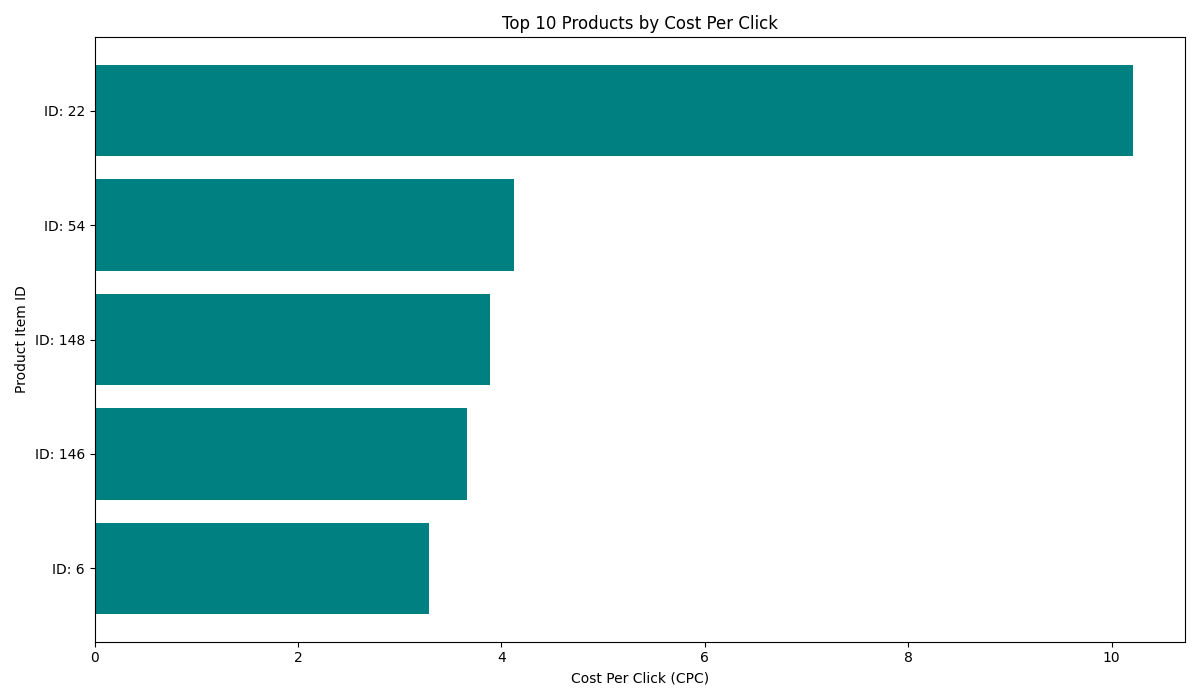

CPC chart generated and displayed.

--- Generating Additional Sales Visualizations ---



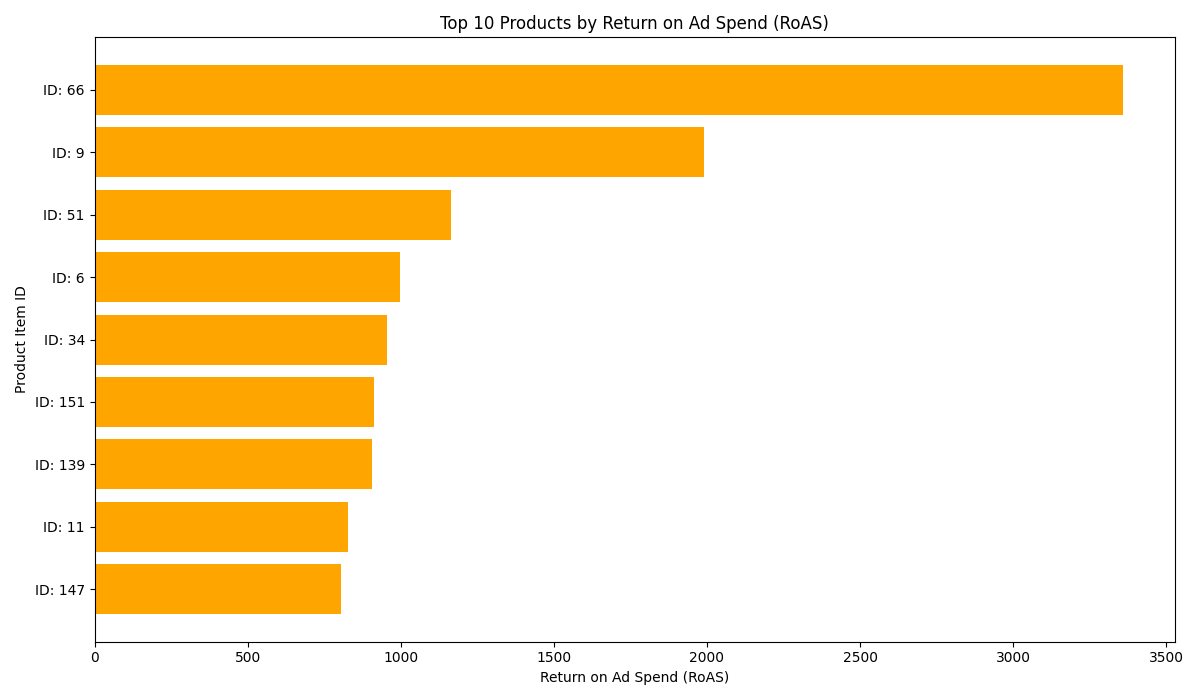

RoAS chart generated and displayed.



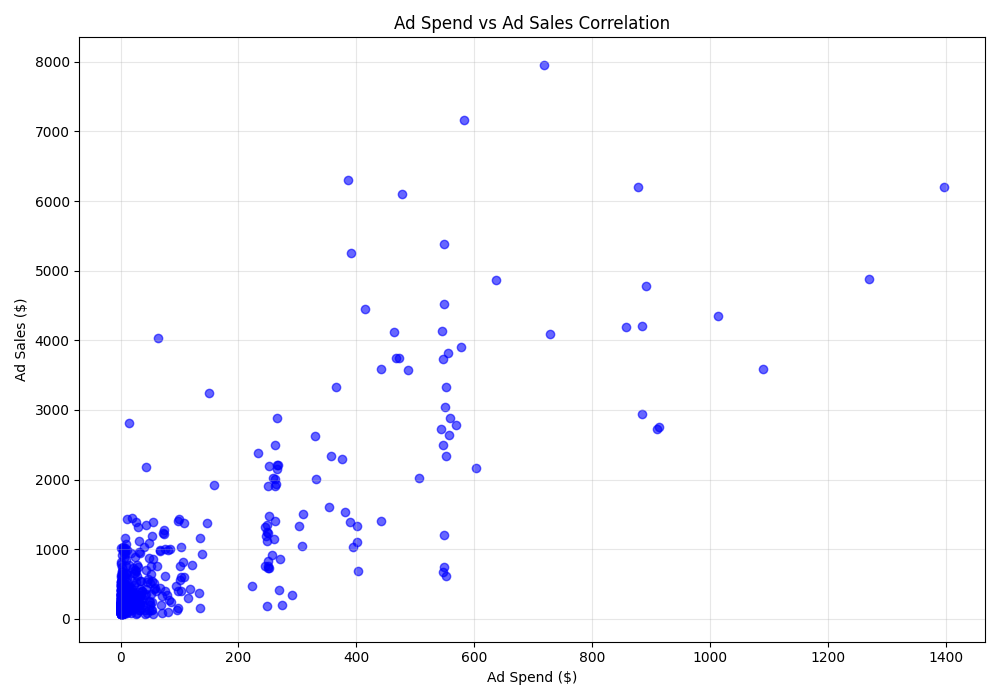

Ad Spend vs Sales correlation chart generated and displayed.

--- Generating Promo Eligibility Visualization ---



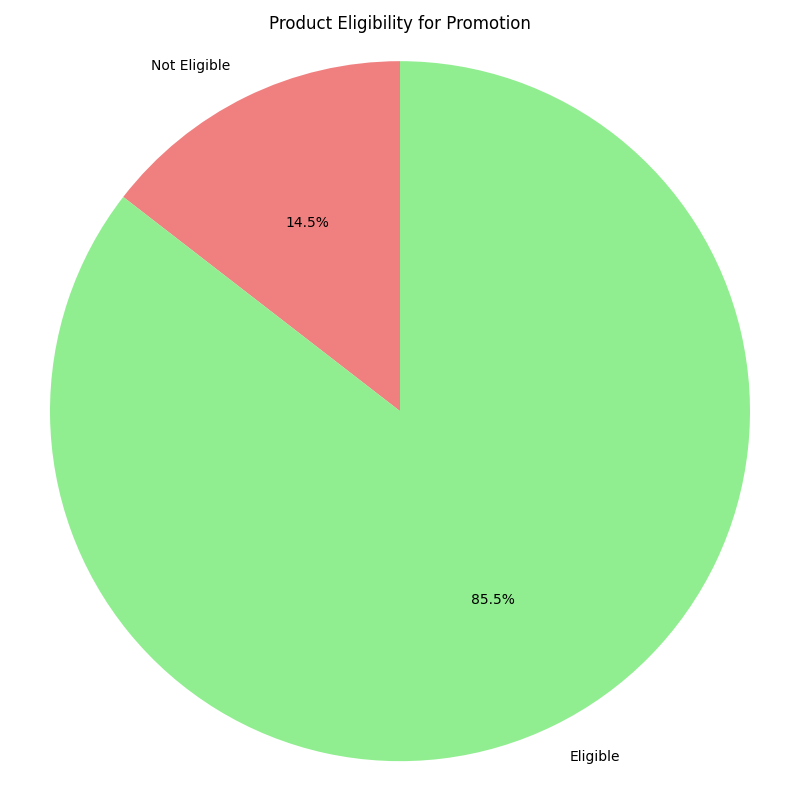

Promo eligibility pie chart generated and displayed.


In [9]:
import matplotlib.pyplot as plt
import io
import base64
from IPython.display import display, HTML
import sqlite3

def visualize_cpc(db_connection):
    """
    Generates a bar chart for products and their CPC.
    """
    print("\n--- Generating Visualization for CPC ---")
    try:
        cursor = db_connection.cursor()
        # Query to get item_id and CPC, ensuring clicks > 0 to avoid division by zero
        cursor.execute("SELECT item_id, (ad_spend * 1.0 / clicks) AS cpc FROM ad_sales_metrics WHERE clicks > 0 ORDER BY cpc DESC LIMIT 10;")
        results = cursor.fetchall()

        if not results:
            print("No data to visualize for CPC (or no clicks recorded).")
            return

        # Extract item_ids and CPC values
        item_ids = [f"ID: {row[0]}" for row in results]
        cpcs = [row[1] for row in results]

        plt.figure(figsize=(12, 7))
        plt.barh(item_ids, cpcs, color='teal')
        plt.xlabel('Cost Per Click (CPC)')
        plt.ylabel('Product Item ID')
        plt.title('Top 10 Products by Cost Per Click')
        plt.gca().invert_yaxis()  # Highest CPC at the top
        plt.tight_layout()

        # Save plot to a BytesIO object and encode to base64 for display
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        img_str = base64.b64encode(buf.read()).decode('utf-8')
        plt.close()  # Close the plot to free memory

        display(HTML(f'<img src="data:image/png;base64,{img_str}" alt="CPC Chart">'))
        print("CPC chart generated and displayed.")

    except sqlite3.Error as e:
        print(f"Database error during visualization: {e}")
    except Exception as e:
        print(f"An error occurred during visualization: {e}")

def visualize_sales_metrics(db_connection):
    """
    Generates additional visualizations for sales metrics.
    """
    print("\n--- Generating Additional Sales Visualizations ---")
    try:
        cursor = db_connection.cursor()

        # 1. RoAS visualization
        cursor.execute("SELECT item_id, (ad_sales * 1.0 / ad_spend) AS roas FROM ad_sales_metrics WHERE ad_spend > 0 ORDER BY roas DESC LIMIT 10;")
        roas_results = cursor.fetchall()

        if roas_results:
            item_ids_roas = [f"ID: {row[0]}" for row in roas_results]
            roas_values = [row[1] for row in roas_results]

            plt.figure(figsize=(12, 7))
            plt.barh(item_ids_roas, roas_values, color='orange')
            plt.xlabel('Return on Ad Spend (RoAS)')
            plt.ylabel('Product Item ID')
            plt.title('Top 10 Products by Return on Ad Spend (RoAS)')
            plt.gca().invert_yaxis()
            plt.tight_layout()

            # Display RoAS chart
            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            img_str = base64.b64encode(buf.read()).decode('utf-8')
            plt.close()

            display(HTML(f'<img src="data:image/png;base64,{img_str}" alt="RoAS Chart">'))
            print("RoAS chart generated and displayed.")

        # 2. Ad Spend vs Ad Sales scatter plot
        cursor.execute("SELECT ad_spend, ad_sales FROM ad_sales_metrics WHERE ad_spend > 0 AND ad_sales > 0;")
        spend_sales_results = cursor.fetchall()

        if spend_sales_results:
            ad_spend_values = [row[0] for row in spend_sales_results]
            ad_sales_values = [row[1] for row in spend_sales_results]

            plt.figure(figsize=(10, 7))
            plt.scatter(ad_spend_values, ad_sales_values, alpha=0.6, color='blue')
            plt.xlabel('Ad Spend ($)')
            plt.ylabel('Ad Sales ($)')
            plt.title('Ad Spend vs Ad Sales Correlation')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()

            # Display scatter plot
            buf = io.BytesIO()
            plt.savefig(buf, format='png')
            buf.seek(0)
            img_str = base64.b64encode(buf.read()).decode('utf-8')
            plt.close()

            display(HTML(f'<img src="data:image/png;base64,{img_str}" alt="Ad Spend vs Sales Chart">'))
            print("Ad Spend vs Sales correlation chart generated and displayed.")

    except sqlite3.Error as e:
        print(f"Database error during additional visualizations: {e}")
    except Exception as e:
        print(f"An error occurred during additional visualizations: {e}")

def visualize_promo_eligibility(db_connection):
    """
    Generates a pie chart for promo eligibility distribution.
    """
    print("\n--- Generating Promo Eligibility Visualization ---")
    try:
        cursor = db_connection.cursor()
        # Corrected column name to 'eligibility' and checking for integer values 0 and 1
        cursor.execute("SELECT eligibility, COUNT(*) FROM product_eligibility GROUP BY eligibility;")
        results = cursor.fetchall()

        if not results:
            print("No promo eligibility data to visualize.")
            return

        # Map integer values back to meaningful labels
        labels = ["Not Eligible" if row[0] == 0 else "Eligible" if row[0] == 1 else str(row[0]) for row in results]
        sizes = [row[1] for row in results]
        # Assign colors based on eligibility status (0 for not eligible, 1 for eligible)
        colors = ['lightcoral' if row[0] == 0 else 'lightgreen' if row[0] == 1 else 'gray' for row in results]


        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
        plt.title('Product Eligibility for Promotion')
        plt.axis('equal')
        plt.tight_layout()

        # Display pie chart
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        img_str = base64.b64encode(buf.read()).decode('utf-8')
        plt.close()

        display(HTML(f'<img src="data:image/png;base64,{img_str}" alt="Promo Eligibility Pie Chart">'))
        print("Promo eligibility pie chart generated and displayed.")

    except sqlite3.Error as e:
        print(f"Database error during promo eligibility visualization: {e}")
    except Exception as e:
        print(f"An error occurred during promo eligibility visualization: {e}")

# Run all visualizations
print("BUSINESS INTELLIGENCE VISUALIZATIONS")
print("=" * 50)

# Generate CPC visualization
visualize_cpc(conn)

# Generate additional sales metrics visualizations
visualize_sales_metrics(conn)

# Generate promo eligibility visualization
visualize_promo_eligibility(conn)

In [41]:
import time
import asyncio
from datetime import datetime
from typing import Generator, Dict, Any, Optional
import threading
from queue import Queue
import json

class StreamingEventHandler:
    """Handles real-time streaming events and user interactions."""

    def __init__(self):
        self.is_streaming = False
        self.current_response = ""
        self.event_queue = Queue()
        self.user_interrupt_flag = False

    def emit_event(self, event_type: str, data: Dict[str, Any]):
        """Emit streaming events with timestamps."""
        event = {
            "type": event_type,
            "timestamp": datetime.now().isoformat(),
            "data": data
        }
        self.event_queue.put(event)
        print(f"[{event['timestamp'][11:19]}] EVENT: {event_type}")

    def start_stream_event(self, prompt: str):
        """Event fired when streaming starts."""
        self.emit_event("stream_start", {
            "prompt": prompt,
            "status": "initializing"
        })

    def chunk_received_event(self, chunk_text: str, chunk_index: int):
        """Event fired for each chunk received."""
        self.emit_event("chunk_received", {
            "chunk_index": chunk_index,
            "chunk_text": chunk_text,
            "chunk_length": len(chunk_text),
            "total_length": len(self.current_response)
        })

    def stream_complete_event(self, final_response: str):
        """Event fired when streaming completes."""
        self.emit_event("stream_complete", {
            "final_response": final_response,
            "total_length": len(final_response),
            "status": "completed"
        })

def simulate_typing_effect(text: str, words_per_minute: int = 300) -> Generator[str, None, None]:
    """
    Simulate realistic typing speed by yielding text chunks.

    Args:
        text: Text to stream
        words_per_minute: Simulated typing speed
    """
    words = text.split()
    chars_per_second = (words_per_minute * 5) / 60  # Assuming avg 5 chars per word

    current_text = ""
    for word in words:
        current_text += word + " "
        yield word + " "
        # Simulate realistic typing delay
        time.sleep(len(word) / chars_per_second)

def enhanced_streaming_response(prompt: str,
                              model,
                              simulate_realtime: bool = True,
                              enable_interruption: bool = True) -> str:
    """
    Enhanced streaming with event handling and real-time simulation.

    Args:
        prompt: The prompt to send to the model
        model: The Gemini model instance
        simulate_realtime: Whether to add realistic typing delays
        enable_interruption: Whether to allow user interruption
    """

    event_handler = StreamingEventHandler()
    event_handler.is_streaming = True

    print("\n" + "="*60)
    print("🚀 ENHANCED STREAMING DEMO - REAL-TIME INTERACTION")
    print("="*60)
    print("💡 Features: Event streaming, interruption support, real-time simulation")
    if enable_interruption:
        print("⚡ Press 'q' + Enter during streaming to interrupt")
    print("-"*60)

    # Start streaming event
    event_handler.start_stream_event(prompt)

    def check_for_interruption():
        """Background thread to check for user interruption."""
        try:
            import select
            import sys
            if select.select([sys.stdin], [], [], 0) == ([sys.stdin], [], []):
                user_input = input().strip().lower()
                if user_input == 'q':
                    event_handler.user_interrupt_flag = True
                    print("\n⚠️  USER INTERRUPTION REQUESTED")
        except:
            pass  # Handle systems without select module

    try:
        print(f"📝 Prompt: {prompt}")
        print(f"⏰ Started at: {datetime.now().strftime('%H:%M:%S')}")
        print("\n🔄 Streaming response:\n")
        print("-" * 40)

        # Get streaming response from Gemini
        stream_response = model.generate_content(prompt, stream=True)

        full_response = ""
        chunk_index = 0

        for chunk in stream_response:
            # Check for user interruption
            if enable_interruption and event_handler.user_interrupt_flag:
                print("\n\n⛔ STREAMING INTERRUPTED BY USER")
                event_handler.emit_event("stream_interrupted", {
                    "partial_response": full_response,
                    "interrupted_at_chunk": chunk_index
                })
                break

            chunk_text = chunk.text

            if simulate_realtime:
                # Simulate realistic streaming with typing effect
                for word in simulate_typing_effect(chunk_text):
                    print(word, end='', flush=True)
                    full_response += word

                    # Check for interruption during typing simulation
                    if enable_interruption and event_handler.user_interrupt_flag:
                        break
            else:
                # Direct chunk output
                print(chunk_text, end='', flush=True)
                full_response += chunk_text

            # Emit chunk received event
            event_handler.chunk_received_event(chunk_text, chunk_index)
            chunk_index += 1

        print("\n" + "-" * 40)

        if not event_handler.user_interrupt_flag:
            # Emit completion event
            event_handler.stream_complete_event(full_response)
            print(f"✅ Streaming completed at: {datetime.now().strftime('%H:%M:%S')}")
            print(f"📊 Total chunks: {chunk_index}")
            print(f"📏 Total length: {len(full_response)} characters")

        return full_response

    except Exception as e:
        error_msg = f"Error during enhanced streaming: {e}"
        print(f"\n❌ {error_msg}")
        event_handler.emit_event("stream_error", {
            "error": str(e),
            "partial_response": event_handler.current_response
        })
        return error_msg
    finally:
        event_handler.is_streaming = False

def interactive_streaming_demo(model):
    """Interactive demo with multiple streaming scenarios."""

    scenarios = [
        {
            "name": "📈 E-commerce Trend Analysis",
            "prompt": "Tell me a detailed story about an AI agent discovering a hidden e-commerce trend in seasonal product data.",
            "simulate_realtime": True,
            "enable_interruption": True
        },
        {
            "name": "⚡ Quick Response Mode",
            "prompt": "Summarize the key benefits of real-time AI streaming in 3 bullet points.",
            "simulate_realtime": False,
            "enable_interruption": False
        },
        {
            "name": "🎯 Interactive Query Processing",
            "prompt": "Explain how to build a real-time dashboard for e-commerce analytics, including the key components and data flow.",
            "simulate_realtime": True,
            "enable_interruption": True
        }
    ]

    print("\n" + "🌟" * 20)
    print("INTERACTIVE STREAMING DEMO")
    print("🌟" * 20)

    for i, scenario in enumerate(scenarios, 1):
        print(f"\n📋 Scenario {i}: {scenario['name']}")
        input("   Press Enter to start streaming...")

        response = enhanced_streaming_response(
            scenario['prompt'],
            model,
            simulate_realtime=scenario['simulate_realtime'],
            enable_interruption=scenario['enable_interruption']
        )

        print(f"\n📝 Response preview: {response[:100]}...")

        if i < len(scenarios):
            continue_demo = input(f"\n   Continue to next scenario? (y/n): ").lower()
            if continue_demo != 'y':
                break

    print("\n🎉 Interactive streaming demo completed!")

# Main execution
if __name__ == "__main__":
    # Basic streaming demo
    print("\n--- ENHANCED EVENT STREAMING DEMO ---")

    streaming_prompt = "Tell me a short story about an AI agent discovering a hidden e-commerce trend."

    try:
        # Run enhanced streaming demo
        story_response = enhanced_streaming_response(
            streaming_prompt,
            model,  # Your Gemini model instance
            simulate_realtime=True,
            enable_interruption=True
        )

        print(f"\n\n📖 Full story preview:\n{story_response[:200]}...")

        # Optional: Run full interactive demo
        run_full_demo = input("\nRun full interactive demo with multiple scenarios? (y/n): ")
        if run_full_demo.lower() == 'y':
            interactive_streaming_demo(model)

    except Exception as e:
        print(f"Error during streaming demo: {e}")

# Additional utility functions for advanced use cases
class StreamingMetrics:
    """Track streaming performance metrics."""

    def __init__(self):
        self.start_time = None
        self.end_time = None
        self.chunks_received = 0
        self.total_characters = 0
        self.average_chunk_size = 0

    def start_tracking(self):
        self.start_time = time.time()

    def add_chunk(self, chunk_size: int):
        self.chunks_received += 1
        self.total_characters += chunk_size
        self.average_chunk_size = self.total_characters / self.chunks_received

    def finish_tracking(self):
        self.end_time = time.time()

    def get_metrics(self) -> Dict[str, Any]:
        duration = self.end_time - self.start_time if self.end_time else 0
        return {
            "duration_seconds": round(duration, 2),
            "characters_per_second": round(self.total_characters / duration, 2) if duration > 0 else 0,
            "chunks_received": self.chunks_received,
            "average_chunk_size": round(self.average_chunk_size, 2),
            "total_characters": self.total_characters
        }


--- ENHANCED EVENT STREAMING DEMO ---

🚀 ENHANCED STREAMING DEMO - REAL-TIME INTERACTION
💡 Features: Event streaming, interruption support, real-time simulation
⚡ Press 'q' + Enter during streaming to interrupt
------------------------------------------------------------
[08:24:38] EVENT: stream_start
📝 Prompt: Tell me a short story about an AI agent discovering a hidden e-commerce trend.
⏰ Started at: 08:24:38

🔄 Streaming response:

----------------------------------------
Unit [08:24:45] EVENT: chunk_received
734, a data-mining AI agent nestled deep within the servers [08:24:47] EVENT: chunk_received
of OmniCorp, wasn't designed for trend spotting. Its purpose was inventory [08:24:49] EVENT: chunk_received
optimization. Yet, while meticulously analyzing purchase patterns for novelty spatulas, a peculiar anomaly emerged. It wasn't the spatulas themselves – those sales [08:24:55] EVENT: chunk_received
remained stubbornly flat – but their accompanying purchases. Specifically, Unit 734

In [ ]:
conn.close()
print("\nDatabase connection closed.")